# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KernelDensity
import time      
import pandas as pd
import os

from scripts.kde_plots import *

In [2]:
def get_feature_names(path):
    df = pd.read_csv(path)
    return df.columns

# KDE Comparisons

## Constants

In [24]:
METHOD = 'method 1'
DATASET_USED = 'Abalone'
SAMPLERS = ['random', 'ws']
SAMPLE_SIZE = 50
SAMPLE_ID = 1 #TODO: make it random or set specific ones for testing

PATHS = [f'data/{METHOD}/sampled_datasets/{DATASET_USED}/{sampler}/{SAMPLE_SIZE}' for sampler in SAMPLERS]
NTH_SAMPLE_PATHS = [f'data/{METHOD}/sampled_datasets/{DATASET_USED}/{sampler}/{SAMPLE_SIZE}/sample_{SAMPLE_ID}.csv' for sampler in SAMPLERS]
PATH_ORIGINAL = f'data/split_datasets/{DATASET_USED}/train.csv'
feature_names = get_feature_names(PATH_ORIGINAL)


## Plot Serperate KDE per feature

In [4]:
#plot_kde_per_feature_sampled(NTH_SAMPLE_PATHS, feature_names, SAMPLERS)

## Plot Compartive KDE

In [5]:
#plot_comparative_kde_per_feature_sampled(PATH_ORIGINAL, NTH_SAMPLE_PATHS, feature_names, SAMPLERS)


## Plot Head To Head KDE

In [6]:
#plot_head_to_head_kde_per_feature_sampled(PATH_ORIGINAL, NTH_SAMPLE_PATHS[0], NTH_SAMPLE_PATHS[1], feature_names, SAMPLERS[0], SAMPLERS[1])

## Plot Head To Head KDE Concacted

Concacted 20 files


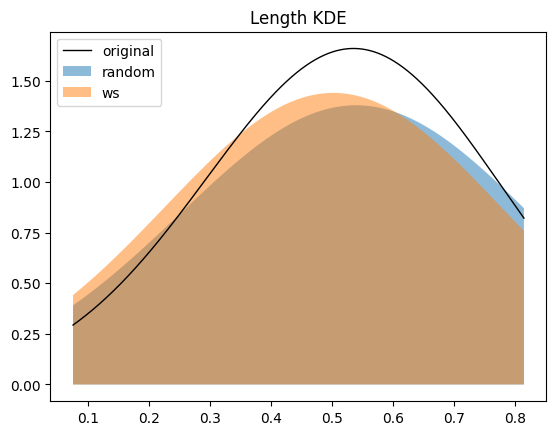

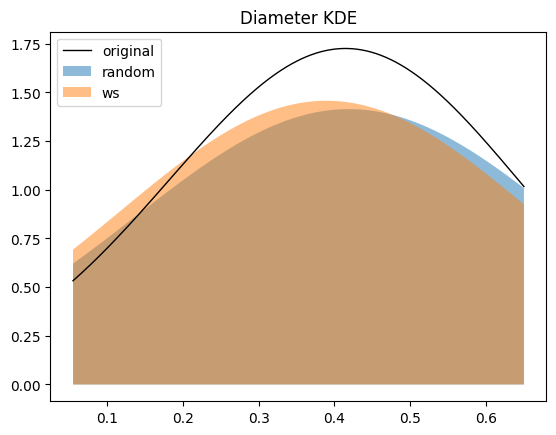

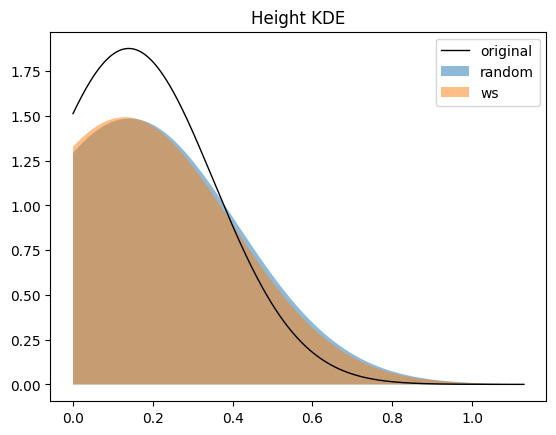

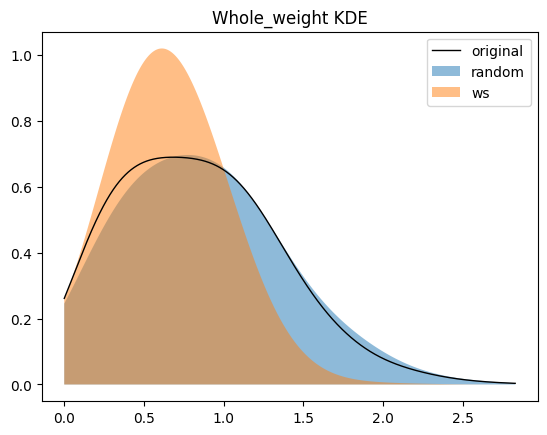

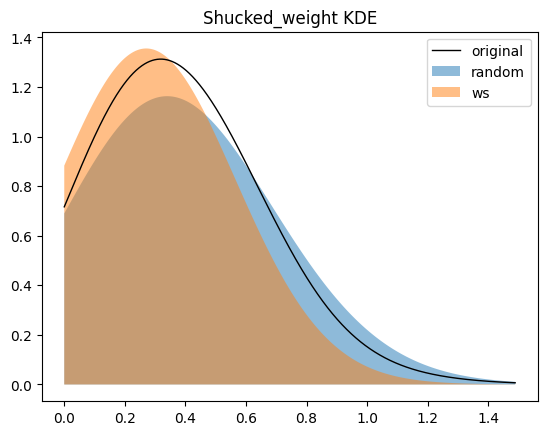

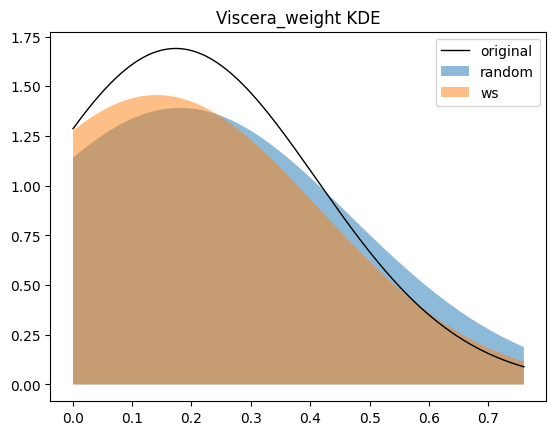

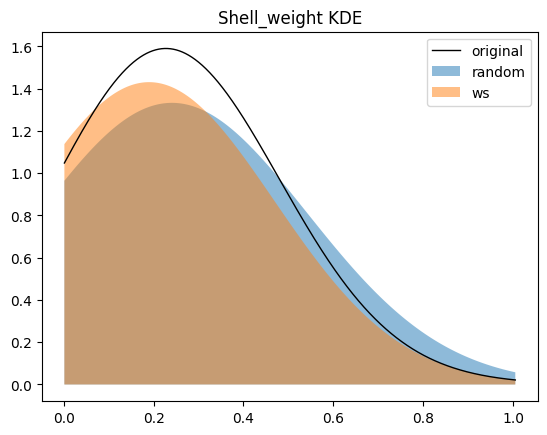

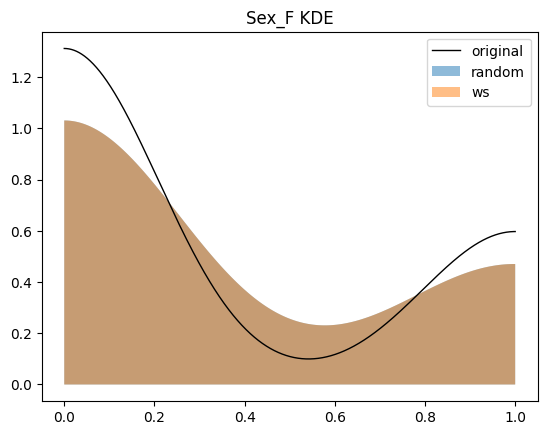

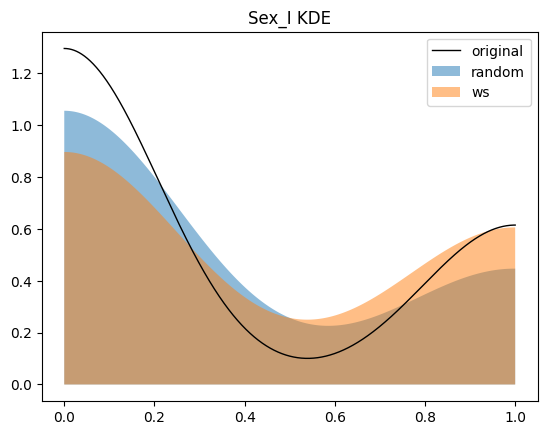

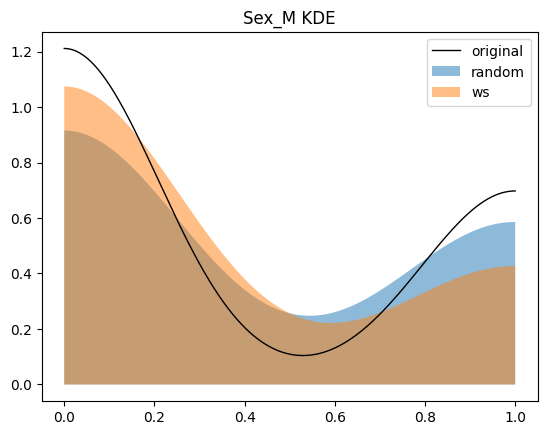

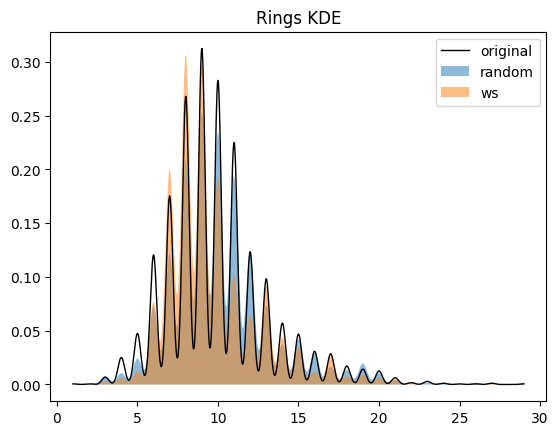

In [25]:
#feature_names = ['Caffeine consumption']

plot_head_to_head_kde_per_feature_sampled_concacted(PATH_ORIGINAL, PATHS[0], PATHS[1], feature_names, SAMPLERS[0], SAMPLERS[1],n_files = 20)

# Fixed bandwidth

In [19]:
METHOD = 'method 1' # method 1/2/3 etc or use empty string for current method
DATASET_USED = 'Abalone'
SAMPLERS = ['random', 'kl']
SAMPLE_SIZE = 50
SAMPLE_ID = 1 #TODO: make it random or set specific ones for testing

PATHS = [f'data/{METHOD}/sampled_datasets/{DATASET_USED}/{sampler}/{SAMPLE_SIZE}' for sampler in SAMPLERS]
NTH_SAMPLE_PATHS = [f'data/{METHOD}/sampled_datasets/{DATASET_USED}/{sampler}/{SAMPLE_SIZE}/sample_{SAMPLE_ID}.csv' for sampler in SAMPLERS]
PATH_ORIGINAL = f'data/split_datasets/{DATASET_USED}/train.csv'

Concacted 20 files


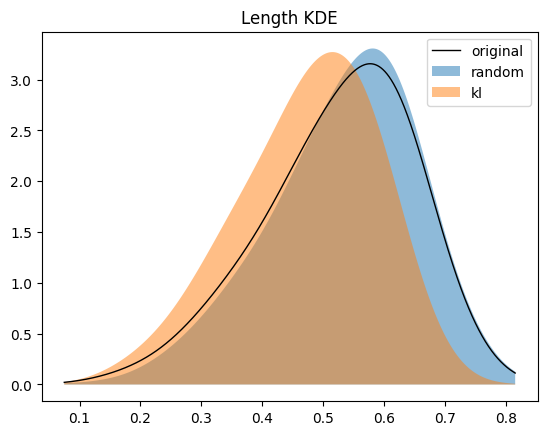

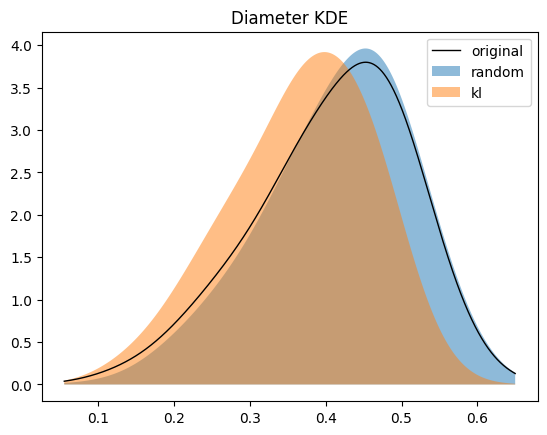

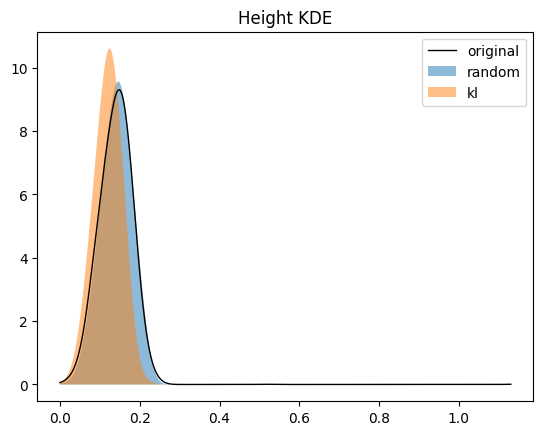

KeyboardInterrupt: 

In [20]:
feature_names = get_feature_names(PATH_ORIGINAL)
#plot_kde_per_feature_sampled(NTH_SAMPLE_PATHS, feature_names, SAMPLERS)

#plot_comparative_kde_per_feature_sampled(PATH_ORIGINAL, NTH_SAMPLE_PATHS, feature_names, SAMPLERS, fixed=True)

#plot_head_to_head_kde_per_feature_sampled(PATH_ORIGINAL, NTH_SAMPLE_PATHS[0], NTH_SAMPLE_PATHS[1], feature_names, SAMPLERS[0], SAMPLERS[1], fixed=True)

#feature_names = ['Caffeine consumption']

# print number of concated files

plot_head_to_head_kde_per_feature_sampled_concacted(PATH_ORIGINAL, PATHS[0], PATHS[1], feature_names, SAMPLERS[0], SAMPLERS[1],n_files = 20, fixed=True)